#### 🧷**각 데이터 별 결과 시각화**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 파일이 저장된 디렉토리 경로 (예시)
directory_path = './'

# 디렉토리에서 모든 CSV 파일 리스트 가져오기
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

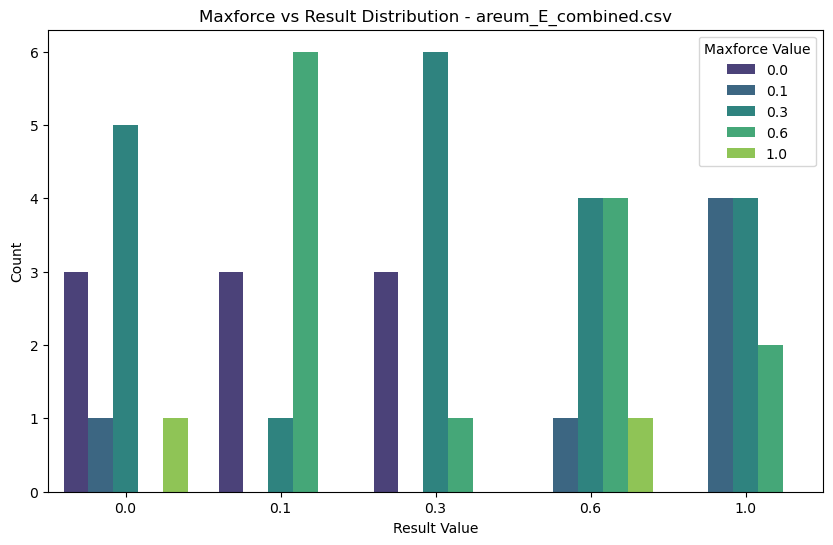

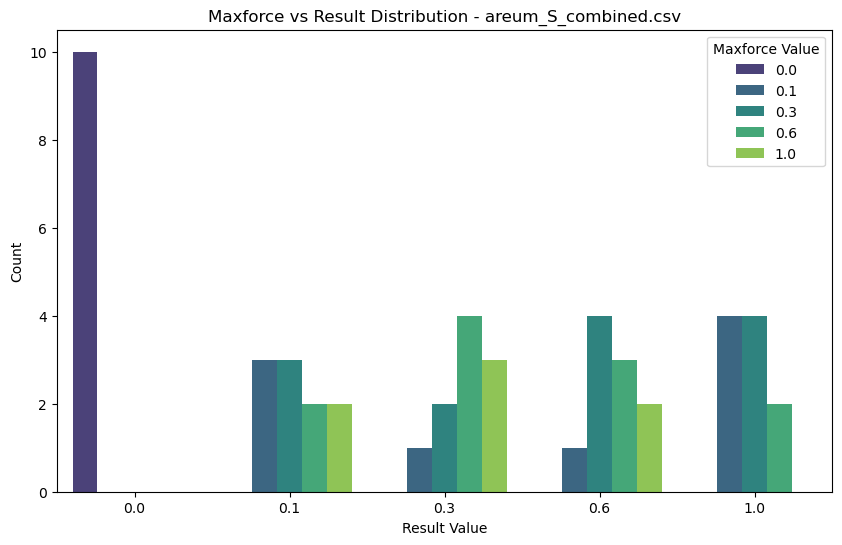

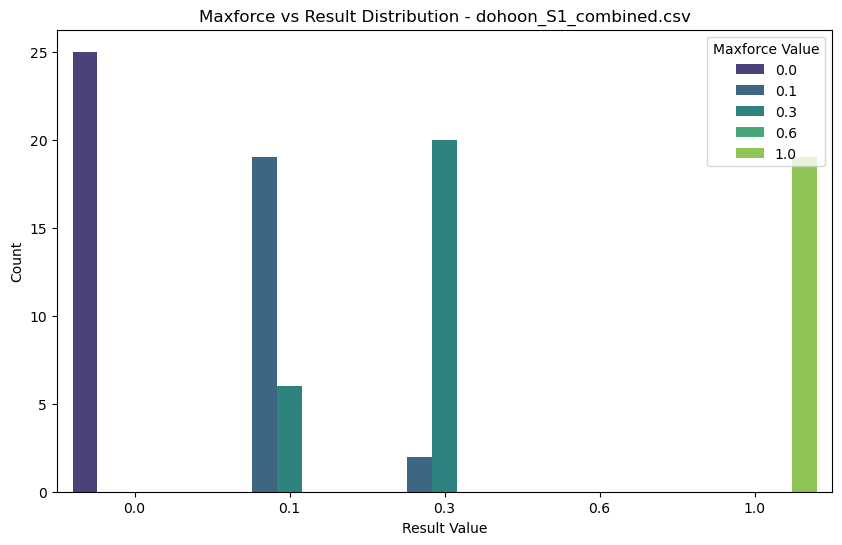

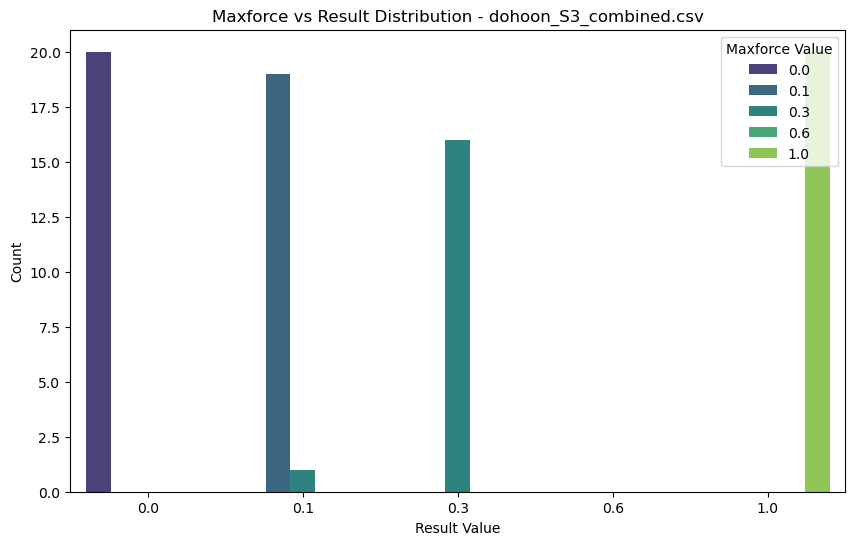

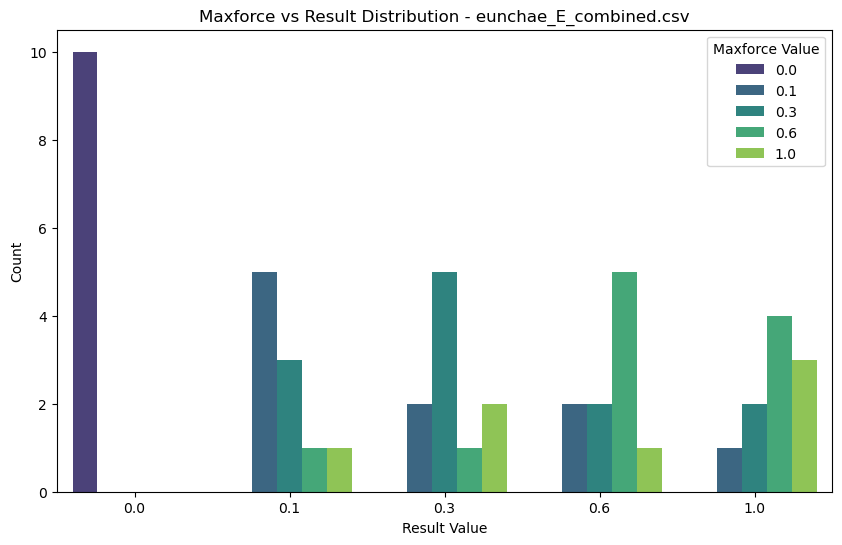

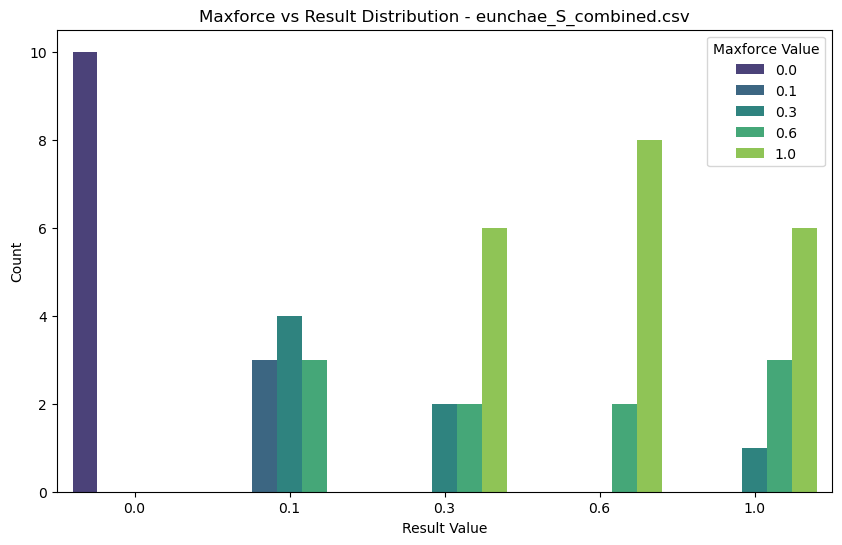

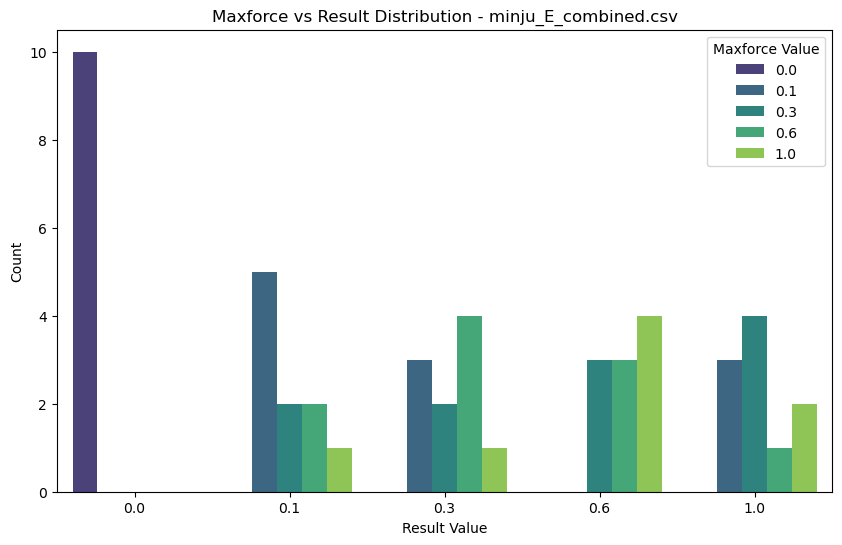

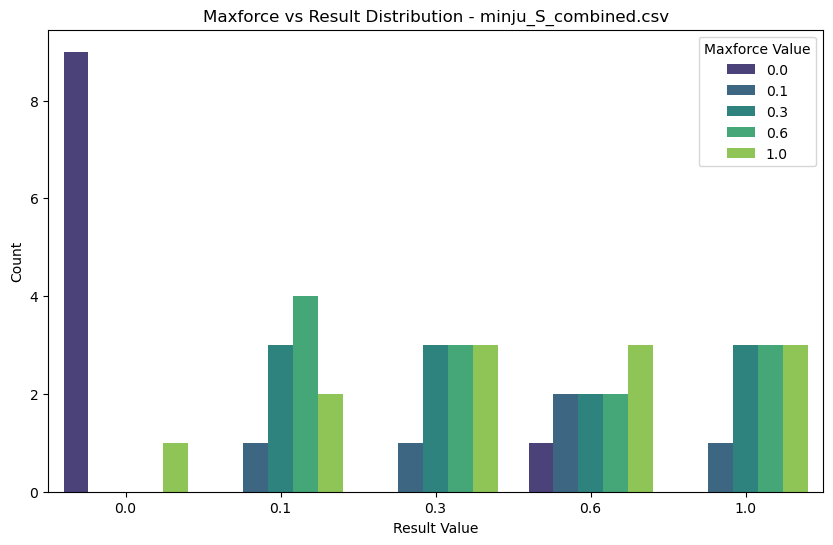

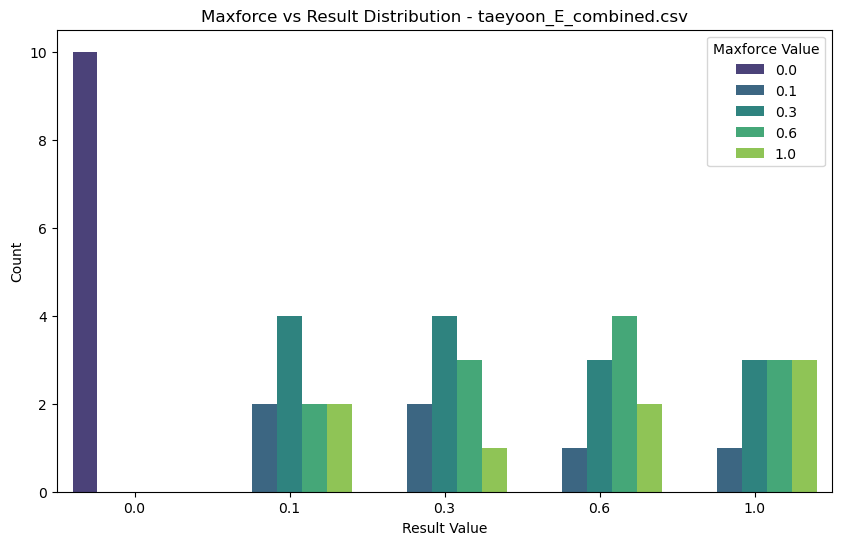

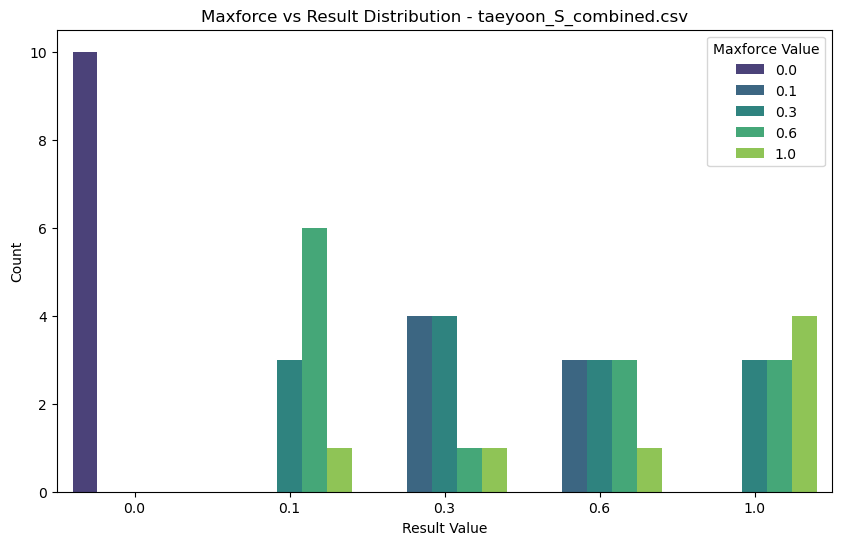

In [2]:
# 각 CSV 파일에 대해 작업 수행
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df.columns and 'result' in df.columns:
        maxforce_values = [0.0, 0.1, 0.3, 0.6, 1.0]
        result_values = [0.0, 0.1, 0.3, 0.6, 1.0]
        
        distribution = []
        
        for maxforce_value in maxforce_values:
            for result_value in result_values:
                count = len(df[(df['maxforce'] == maxforce_value) & (df['result'] == result_value)])
                distribution.append({
                    'maxforce_value': maxforce_value,
                    'result_value': result_value,
                    'count': count
                })
        
        distribution_df = pd.DataFrame(distribution)
        
        # 막대그래프 생성
        plt.figure(figsize=(10, 6))
        sns.barplot(x='result_value', y='count', hue='maxforce_value', data=distribution_df, palette='viridis')
        
        # 그래프 세부 설정
        plt.title(f'Maxforce vs Result Distribution - {csv_file}')
        plt.xlabel('Result Value')
        plt.ylabel('Count')
        plt.legend(title='Maxforce Value')
        
        # 그래프 출력
        plt.show()
        
    else:
        print(f"'maxforce' or 'result' column missing in {csv_file}")

                 filename  correlation  mean_absolute_difference  \
0    areum_E_combined.csv     0.037220                     0.332   
1    areum_S_combined.csv     0.128401                     0.332   
2  dohoon_S1_combined.csv     0.935460                     0.052   
3  dohoon_S3_combined.csv     0.990683                     0.012   
4  eunchae_E_combined.csv     0.545310                     0.200   
5  eunchae_S_combined.csv     0.673072                     0.244   
6    minju_E_combined.csv     0.380471                     0.264   
7    minju_S_combined.csv     0.281042                     0.324   
8  taeyoon_E_combined.csv     0.452374                     0.240   
9  taeyoon_S_combined.csv     0.477712                     0.248   

   identical_percentage  
0                  26.0  
1                  36.0  
2                  83.0  
3                  94.0  
4                  56.0  
5                  46.0  
6                  44.0  
7                  36.0  
8                

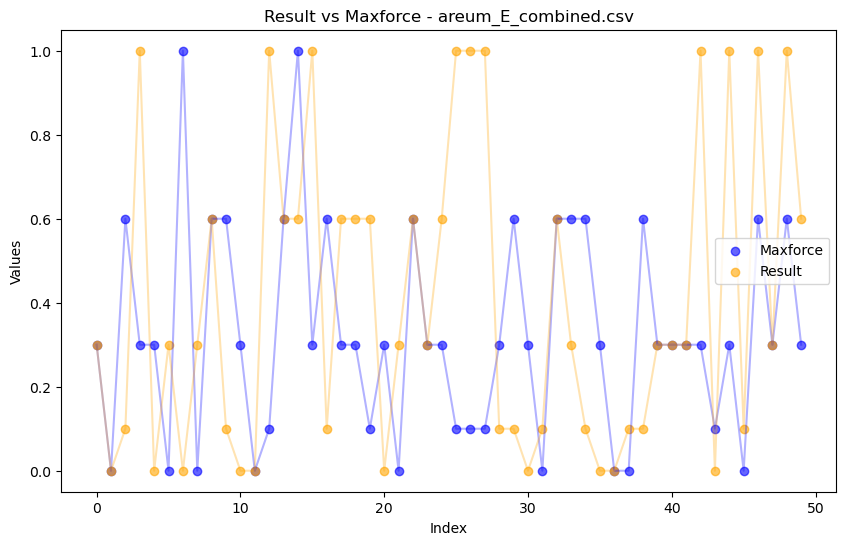

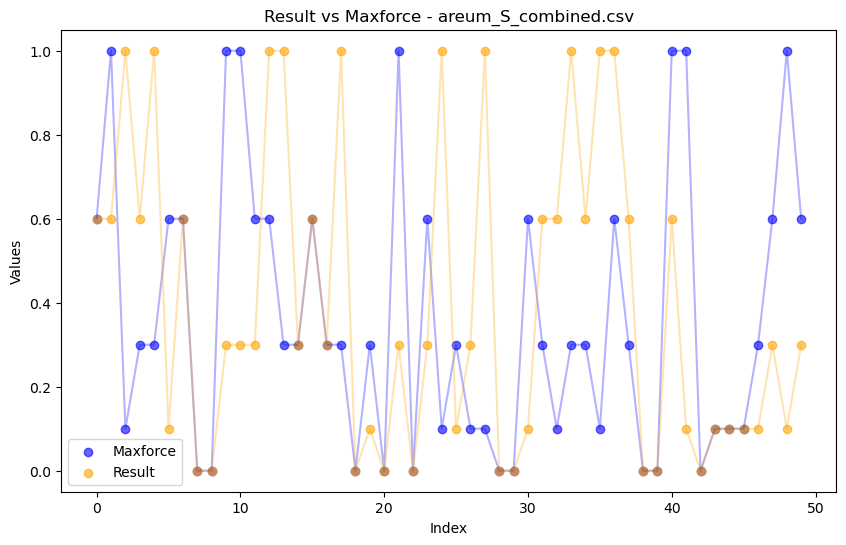

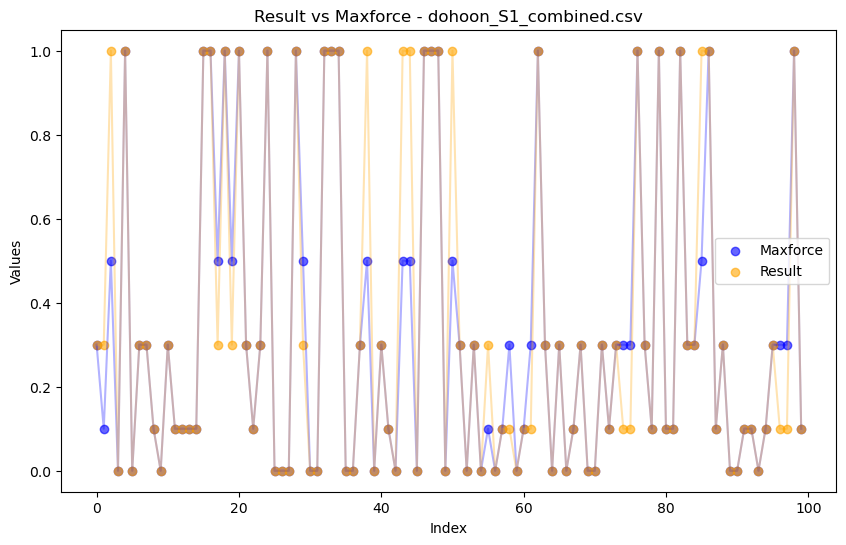

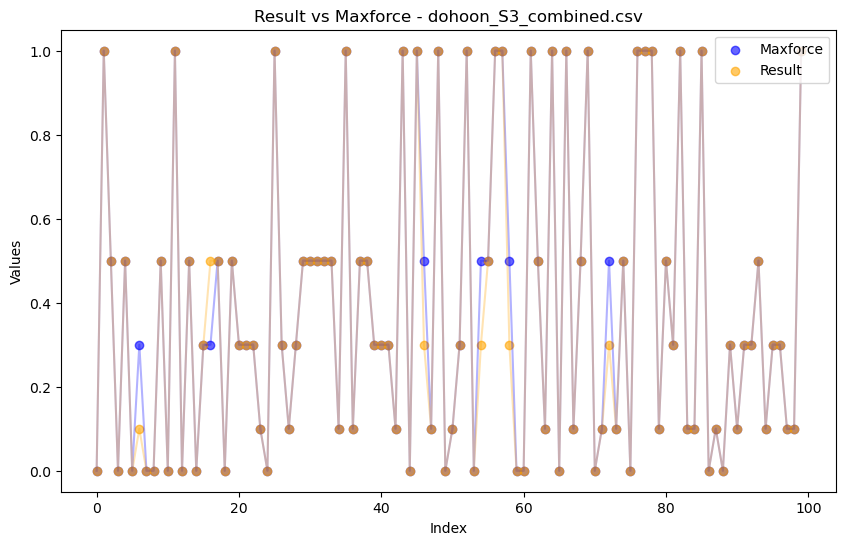

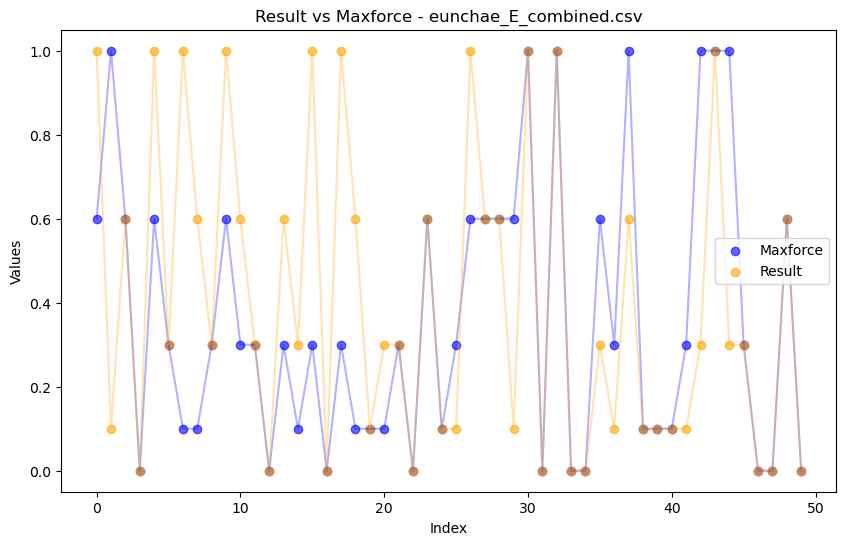

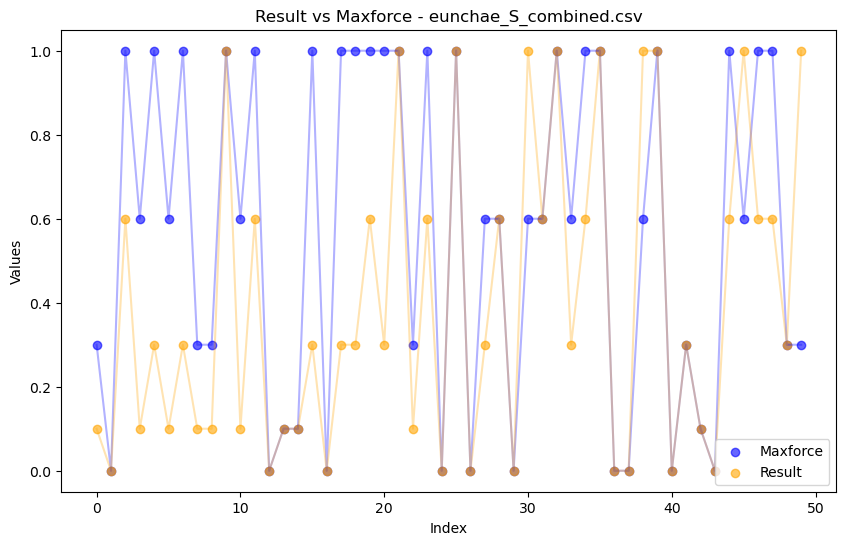

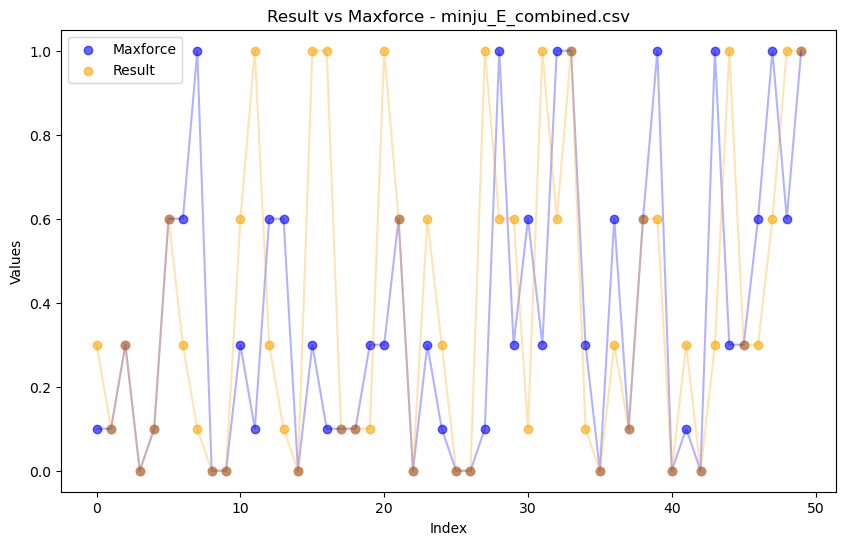

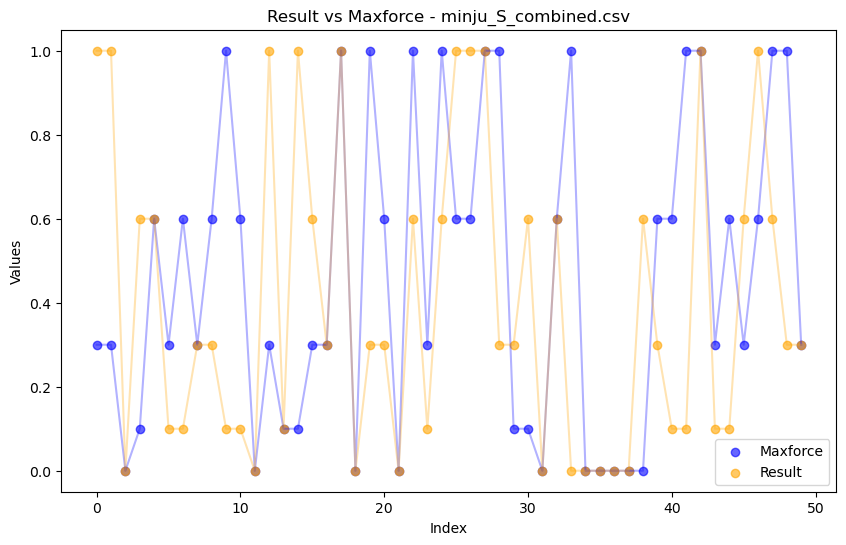

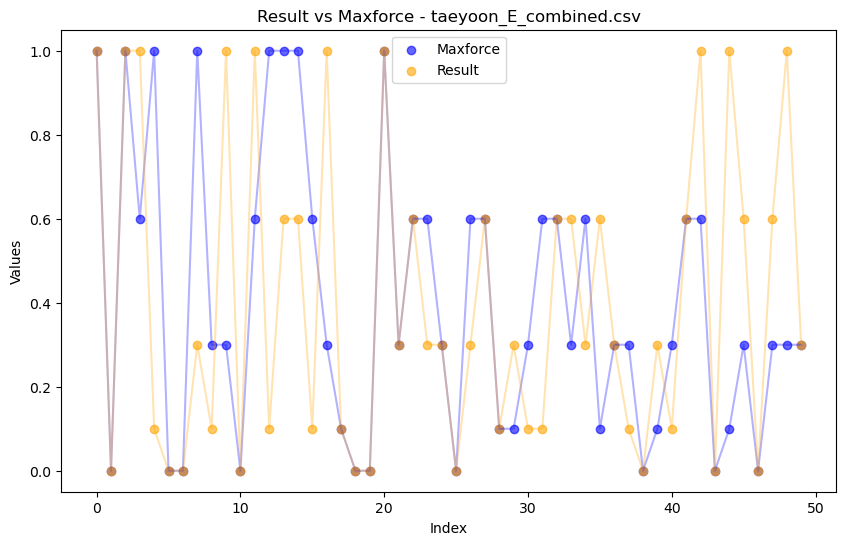

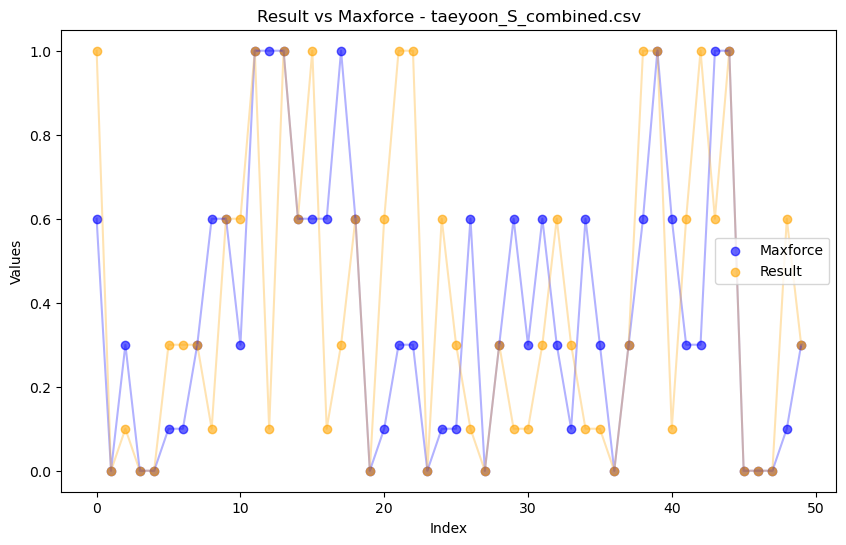

In [3]:
# 결과를 저장할 리스트 초기화
comparison_results = []

# 각 CSV 파일에 대해 작업 수행
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df.columns and 'result' in df.columns:
        # 상관계수 계산
        correlation = df['maxforce'].corr(df['result'])
        
        # 차이의 절대값 평균 계산
        mean_absolute_difference = (df['maxforce'] - df['result']).abs().mean()
        
        # maxforce와 result가 동일한 값의 비율 계산
        identical_percentage = (df['maxforce'] == df['result']).mean() * 100
        
        # 결과 저장
        comparison_results.append({
            'filename': csv_file,
            'correlation': correlation,
            'mean_absolute_difference': mean_absolute_difference,
            'identical_percentage': identical_percentage
        })
        
        # 그래프 생성
        plt.figure(figsize=(10, 6))
        
        # 산점도 (scatter plot)
        plt.scatter(df.index, df['maxforce'], label='Maxforce', color='blue', alpha=0.6)
        plt.scatter(df.index, df['result'], label='Result', color='orange', alpha=0.6)
        
        # 선 그래프 (line plot)
        plt.plot(df.index, df['maxforce'], color='blue', alpha=0.3)
        plt.plot(df.index, df['result'], color='orange', alpha=0.3)
        
        # 제목 및 라벨 추가
        plt.title(f'Result vs Maxforce - {csv_file}')
        plt.xlabel('Index')
        plt.ylabel('Values')
        plt.legend()
                
    else:
        print(f"'maxforce' or 'result' column missing in {csv_file}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(comparison_results)

# 결과 출력
print(results_df)


#### 🧷**강성체와 탄성체 각 데이터 합산 결과**

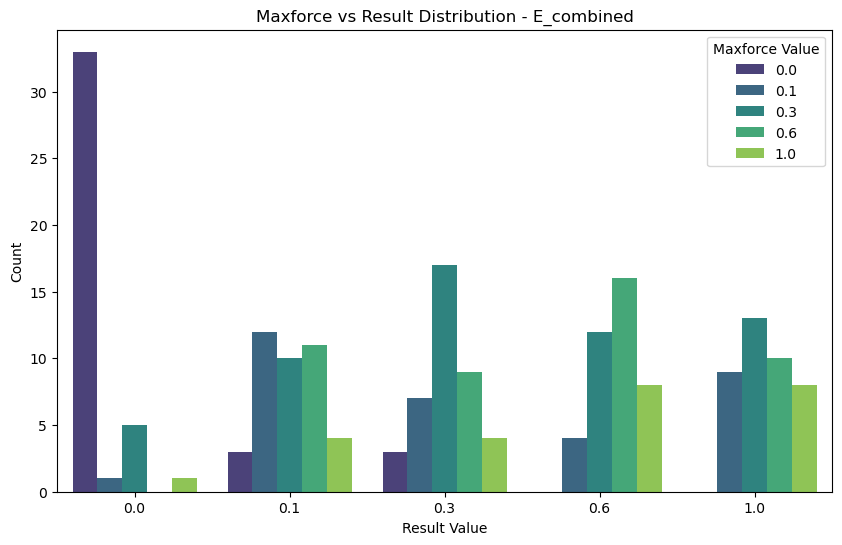

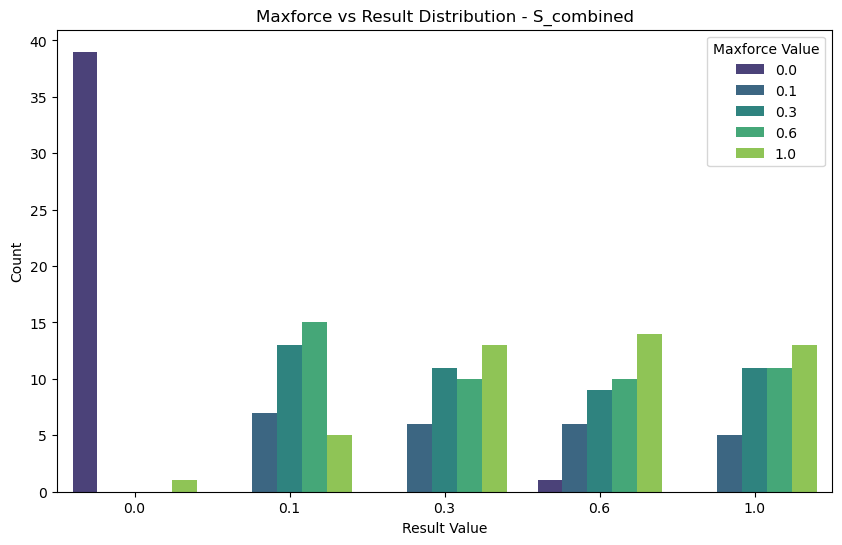

In [4]:
# E_combined와 S_combined 파일 리스트 필터링
e_combined_files = [f for f in os.listdir(directory_path) if f.endswith('E_combined.csv')]
s_combined_files = [f for f in os.listdir(directory_path) if f.endswith('S_combined.csv')]

# E_combined와 S_combined 데이터프레임 각각 합치기
df_e_combined = pd.concat([pd.read_csv(os.path.join(directory_path, file)) for file in e_combined_files])
df_s_combined = pd.concat([pd.read_csv(os.path.join(directory_path, file)) for file in s_combined_files])

# 데이터프레임을 합친 후 각각 동일한 작업 수행
for df_combined, combined_name in [(df_e_combined, 'E_combined'), (df_s_combined, 'S_combined')]:
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df_combined.columns and 'result' in df_combined.columns:
        maxforce_values = [0.0, 0.1, 0.3, 0.6, 1.0]
        result_values = [0.0, 0.1, 0.3, 0.6, 1.0]
        
        distribution = []
        
        for maxforce_value in maxforce_values:
            for result_value in result_values:
                count = len(df_combined[(df_combined['maxforce'] == maxforce_value) & (df_combined['result'] == result_value)])
                distribution.append({
                    'maxforce_value': maxforce_value,
                    'result_value': result_value,
                    'count': count
                })
        
        distribution_df = pd.DataFrame(distribution)
        
        # 막대그래프 생성
        plt.figure(figsize=(10, 6))
        sns.barplot(x='result_value', y='count', hue='maxforce_value', data=distribution_df, palette='viridis')
        
        # 그래프 세부 설정
        plt.title(f'Maxforce vs Result Distribution - {combined_name}')
        plt.xlabel('Result Value')
        plt.ylabel('Count')
        plt.legend(title='Maxforce Value')
        
        # 그래프 출력
        plt.show()
        
    else:
        print(f"'maxforce' or 'result' column missing in {combined_name}")


In [5]:
# 결과를 저장할 리스트 초기화
comparison_results = []

# 각 데이터프레임에 대해 작업 수행
for df_combined, combined_name in [(df_e_combined, 'E_combined'), (df_s_combined, 'S_combined')]:
    
    # maxforce와 result 열이 있는지 확인
    if 'maxforce' in df_combined.columns and 'result' in df_combined.columns:
        # 상관계수 계산
        correlation = df_combined['maxforce'].corr(df_combined['result'])
        
        # 차이의 절대값 평균 계산
        mean_absolute_difference = (df_combined['maxforce'] - df_combined['result']).abs().mean()
        
        # maxforce와 result가 동일한 값의 비율 계산
        identical_percentage = (df_combined['maxforce'] == df_combined['result']).mean() * 100
        
        # 결과 저장
        comparison_results.append({
            'filename': combined_name,
            'correlation': correlation,
            'mean_absolute_difference': mean_absolute_difference,
            'identical_percentage': identical_percentage
        })
                
    else:
        print(f"'maxforce' or 'result' column missing in {combined_name}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(comparison_results)

# 결과 출력
print(results_df)

     filename  correlation  mean_absolute_difference  identical_percentage
0  E_combined     0.370807                     0.259                  43.0
1  S_combined     0.390829                     0.287                  40.0
